## Model Training

#### 1.1 Import Data and Required Packages
##### Importing Pandas, Numpy, Matplotlib, Seaborn and Warings Library.

In [4]:
pip install scikit-learn catboost xgboost

   ---------------------------------------- 0.0/101.2 MB ? eta -:--:--
   ---------------------------------------- 0.0/101.2 MB ? eta -:--:--
   ---------------------------------------- 0.1/101.2 MB 2.1 MB/s eta 0:00:48
   ---------------------------------------- 0.3/101.2 MB 2.3 MB/s eta 0:00:43
   ---------------------------------------- 0.6/101.2 MB 3.6 MB/s eta 0:00:28
   ---------------------------------------- 1.1/101.2 MB 5.5 MB/s eta 0:00:19
    --------------------------------------- 1.8/101.2 MB 7.2 MB/s eta 0:00:14
    --------------------------------------- 2.2/101.2 MB 7.2 MB/s eta 0:00:14
   - -------------------------------------- 2.6/101.2 MB 7.6 MB/s eta 0:00:13
   - -------------------------------------- 3.0/101.2 MB 7.6 MB/s eta 0:00:13
   - -------------------------------------- 3.7/101.2 MB 8.4 MB/s eta 0:00:12
   - -------------------------------------- 3.7/101.2 MB 7.4 MB/s eta 0:00:14
   - -------------------------------------- 3.7/101.2 MB 7.4 MB/s eta 0:00:14


In [21]:
# Basic Import
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
# Modelling
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier
from sklearn.svm import SVC
from sklearn.linear_model import Ridge,Lasso
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from sklearn.model_selection import RandomizedSearchCV
from catboost import CatBoostClassifier
from xgboost import XGBClassifier
from sklearn.ensemble import GradientBoostingClassifier
import warnings

#### Import the CSV Data as Pandas DataFrame

In [6]:
df = pd.read_csv('data/GDM.csv')

#### Show Top 5 Records

In [7]:
df.head()

,Case_Number,Age,No_of_Pregnancy,Gestation_in_previous_Pregnancy,BMI,HDL,Family_History,unexplained_prenetal_loss,Large_Child_or_Birth_Default,PCOS,Sys_BP,Dia_BP,OGTT,Hemoglobin,Sedentary_Lifestyle,Prediabetes,Result
0,1,22,2,1,NaN,55.0,0,0,0,0,102.0,69,NaN,12.0,0,0,0
1,2,26,2,1,NaN,53.0,0,0,0,0,101.0,63,NaN,12.4,0,0,0
2,3,29,1,0,NaN,50.0,0,0,0,0,118.0,79,NaN,14.3,0,0,0
3,4,28,2,1,NaN,51.0,0,0,0,0,99.0,70,NaN,15.0,0,0,0
4,5,21,2,1,NaN,52.0,0,0,0,0,116.0,65,NaN,15.0,0,0,0


#### Preparing X and Y variables

In [8]:
X = df.drop(columns=['Case_Number','Result'],axis=1)

In [9]:
X.head()

,Age,No_of_Pregnancy,Gestation_in_previous_Pregnancy,BMI,HDL,Family_History,unexplained_prenetal_loss,Large_Child_or_Birth_Default,PCOS,Sys_BP,Dia_BP,OGTT,Hemoglobin,Sedentary_Lifestyle,Prediabetes
0,22,2,1,NaN,55.0,0,0,0,0,102.0,69,NaN,12.0,0,0
1,26,2,1,NaN,53.0,0,0,0,0,101.0,63,NaN,12.4,0,0
2,29,1,0,NaN,50.0,0,0,0,0,118.0,79,NaN,14.3,0,0
3,28,2,1,NaN,51.0,0,0,0,0,99.0,70,NaN,15.0,0,0
4,21,2,1,NaN,52.0,0,0,0,0,116.0,65,NaN,15.0,0,0


In [10]:
y = df['Result']

In [11]:
y

0       0
1       0
2       0
3       0
4       0
       ..
3520    1
3521    1
3522    1
3523    0
3524    0
Name: Result, Length: 3525, dtype: int64

In [15]:
# Creation of Column Transformer with 3 types of transformers if needed

#num_features = X.select_dtypes(exclude="object").columns
#cat_features = X.select_dtypes(include="object").columns

#from sklearn.preprocessing import OneHotEncoder, StandardScaler
#from sklearn.compose import ColumnTransformer

#numeric_transformer = StandardScaler()
#oh_transformer = OneHotEncoder()

#preprocessor = ColumnTransformer(
#    [
#        ("OneHotEncoder", oh_transformer, cat_features),
#         ("StandardScaler", numeric_transformer, num_features),        
#    ]
#)

In [14]:
#X = preprocessor.fit_transform(X)

NameError: name 'preprocessor' is not defined

In [15]:
X.shape

(3525, 15)

In [16]:
# separate dataset into train and test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=42)
X_train.shape, X_test.shape

((2820, 15), (705, 15))

#### Create an Evaluate Function to give all metrics after model Training

In [18]:
#For Regression
#def evaluate_model(true, predicted):
#    mae = mean_absolute_error(true, predicted)
#    mse = mean_squared_error(true, predicted)
#    rmse = np.sqrt(mean_squared_error(true, predicted))
#    r2_square = r2_score(true, predicted)
#    return mae, rmse, r2_square

#For Classification
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

def evaluate_classification_model(true, predicted):
    accuracy = accuracy_score(true, predicted)
    precision = precision_score(true, predicted, average='weighted')
    recall = recall_score(true, predicted, average='weighted')
    f1 = f1_score(true, predicted, average='weighted')
    conf_matrix = confusion_matrix(true, predicted)
    return accuracy, precision, recall, f1, conf_matrix

In [28]:
#Only for Classification

from sklearn.impute import SimpleImputer

# Impute missing values
imputer = SimpleImputer(strategy='mean')
X_train = pd.DataFrame(imputer.fit_transform(X_train), columns=X_train.columns)
X_test = pd.DataFrame(imputer.transform(X_test), columns=X_test.columns)


In [29]:
# Verify no NaNs are present (Only for Classification)
nan_columns = X_train.columns[X_train.isna().any()].tolist()
if nan_columns:
    print("Columns with NaN values after imputation:", nan_columns)
else:
    print("No NaN values present after imputation.")

assert not np.any(np.isnan(X_train)), "There are NaN values in X_train after imputation."
assert not np.any(np.isnan(X_test)), "There are NaN values in X_test after imputation."


No NaN values present after imputation.


In [30]:
#For Regression
'''models = {
    "Linear Regression": LinearRegression(),
    "Lasso": Lasso(),
    "Ridge": Ridge(),
    "K-Neighbors Regressor": KNeighborsRegressor(),
    "Decision Tree": DecisionTreeRegressor(),
    "Random Forest Regressor": RandomForestRegressor(),
    "XGBRegressor": XGBRegressor(), 
    "CatBoosting Regressor": CatBoostRegressor(verbose=False),
    "AdaBoost Regressor": AdaBoostRegressor()
}
model_list = []
r2_list =[]

for i in range(len(list(models))):
    model = list(models.values())[i]
    model.fit(X_train, y_train) # Train model

    # Make predictions
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)
    
    # Evaluate Train and Test dataset
    model_train_mae , model_train_rmse, model_train_r2 = evaluate_model(y_train, y_train_pred)

    model_test_mae , model_test_rmse, model_test_r2 = evaluate_model(y_test, y_test_pred)

    
    print(list(models.keys())[i])
    model_list.append(list(models.keys())[i])
    
    print('Model performance for Training set')
    print("- Root Mean Squared Error: {:.4f}".format(model_train_rmse))
    print("- Mean Absolute Error: {:.4f}".format(model_train_mae))
    print("- R2 Score: {:.4f}".format(model_train_r2))

    print('----------------------------------')
    
    print('Model performance for Test set')
    print("- Root Mean Squared Error: {:.4f}".format(model_test_rmse))
    print("- Mean Absolute Error: {:.4f}".format(model_test_mae))
    print("- R2 Score: {:.4f}".format(model_test_r2))
    r2_list.append(model_test_r2)
    
    print('='*35)
    print('\n')'''

#For Classification
models = {
    "K-Neighbors Classifier": KNeighborsClassifier(),
    "Decision Tree": DecisionTreeClassifier(),
    "Random Forest Classifier": RandomForestClassifier(),
    "XGBClassifier": XGBClassifier(use_label_encoder=False, eval_metric='logloss'), 
    "CatBoosting Classifier": CatBoostClassifier(verbose=False),
    "AdaBoost Classifier": AdaBoostClassifier(),
    "Gradient Boosting Classifier": GradientBoostingClassifier()
}

# Lists to store model names and their evaluation metrics
model_list = []
accuracy_list = []

# Iterate over models, train, predict and evaluate
for model_name, model in models.items():
    # Train model
    model.fit(X_train, y_train)

    # Make predictions
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)

    # Evaluate Train and Test dataset
    train_accuracy, train_precision, train_recall, train_f1, train_conf_matrix = evaluate_classification_model(y_train, y_train_pred)
    test_accuracy, test_precision, test_recall, test_f1, test_conf_matrix = evaluate_classification_model(y_test, y_test_pred)

    # Print model performance
    print(f"{model_name}")
    model_list.append(model_name)

    print('Model performance for Training set')
    print(f"- Accuracy: {train_accuracy:.4f}")
    print(f"- Precision: {train_precision:.4f}")
    print(f"- Recall: {train_recall:.4f}")
    print(f"- F1 Score: {train_f1:.4f}")
    print('Confusion Matrix:\n', train_conf_matrix)

    print('----------------------------------')

    print('Model performance for Test set')
    print(f"- Accuracy: {test_accuracy:.4f}")
    print(f"- Precision: {test_precision:.4f}")
    print(f"- Recall: {test_recall:.4f}")
    print(f"- F1 Score: {test_f1:.4f}")
    print('Confusion Matrix:\n', test_conf_matrix)
    accuracy_list.append(test_accuracy)

    print('=' * 35)
    print('\n')

K-Neighbors Classifier
Model performance for Training set
- Accuracy: 0.9784
- Precision: 0.9785
- Recall: 0.9784
- F1 Score: 0.9784
Confusion Matrix:
 [[1667   38]
 [  23 1092]]
----------------------------------
Model performance for Test set
- Accuracy: 0.9702
- Precision: 0.9706
- Recall: 0.9702
- F1 Score: 0.9703
Confusion Matrix:
 [[434  14]
 [  7 250]]


Decision Tree
Model performance for Training set
- Accuracy: 1.0000
- Precision: 1.0000
- Recall: 1.0000
- F1 Score: 1.0000
Confusion Matrix:
 [[1705    0]
 [   0 1115]]
----------------------------------
Model performance for Test set
- Accuracy: 0.9745
- Precision: 0.9746
- Recall: 0.9745
- F1 Score: 0.9745
Confusion Matrix:
 [[437  11]
 [  7 250]]


Random Forest Classifier
Model performance for Training set
- Accuracy: 1.0000
- Precision: 1.0000
- Recall: 1.0000
- F1 Score: 1.0000
Confusion Matrix:
 [[1705    0]
 [   0 1115]]
----------------------------------
Model performance for Test set
- Accuracy: 0.9674
- Precision: 0.

### Results

In [33]:
pd.DataFrame(list(zip(model_list, accuracy_list)), columns=['Model Name', 'Accuracy']).sort_values(by=["Accuracy"],ascending=False)

,Model Name,Accuracy
1,Decision Tree,0.974468
4,CatBoosting Classifier,0.974468
0,K-Neighbors Classifier,0.970213
2,Random Forest Classifier,0.967376
3,XGBClassifier,0.967376
6,Gradient Boosting Classifier,0.967376
5,AdaBoost Classifier,0.965957


## Just Decision Tree

In [49]:
lin_model = DecisionTreeClassifier()
lin_model = lin_model.fit(X_train, y_train)
y_pred = lin_model.predict(X_test)
score = accuracy_score(y_test, y_pred)*100
print(" Accuracy of the model is %.2f" %score)

 Accuracy of the model is 97.59


## Plot Confusion Matrix

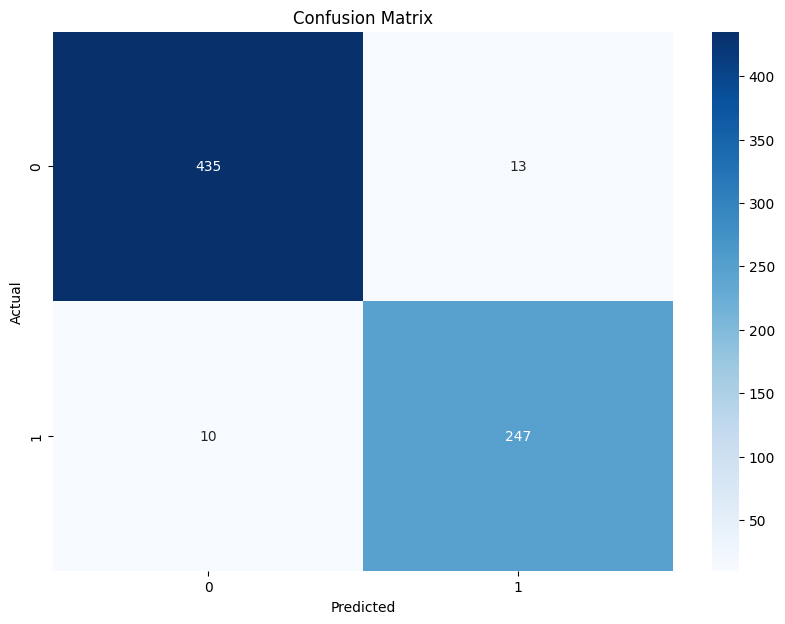

In [56]:
#For Regression
#plt.scatter(y_test,y_pred);
#plt.xlabel('Actual');
#plt.ylabel('Predicted');

from sklearn.metrics import confusion_matrix

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_test_pred)

plt.figure(figsize=(10, 7))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=model.classes_, yticklabels=model.classes_)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()
